# Компьютерное зрение

В качестве базовой задачи CV (Computer Vision) возьмем задачу классификации рукописный цифр из набора данных [MNIST](https://www.kaggle.com/c/digit-recognizer)

Примеры изображений из этого набора данных представлены на рисунке.

In [1]:
from IPython.display import Image
Image(url='https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png', width=500, )

Каждое изображение имеет разрешение 28x28 пикселов. Каждый пиксел закодирован одним байтом, который определяет оттенок серого (0 - черный, 255 - белый)

## Загрузка данных

Набора данных MNIST настолько популярен, что в библиотеке tensorflow уже есть готовая функция, которая скачает его из сети и загрузит в виде подготовленных массивов, разделенных на обучающую и проверочную выборки

In [2]:
import numpy as np
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

2023-07-24 11:42:22.781792: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-24 11:42:22.783862: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 11:42:22.825761: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 11:42:22.826506: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 11:42:23.661967: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Нейронные сети

Алгоритмы компьютерного зрения, основанные на нейронных сетях хорошо себя зарекомендовали на практике. Для решения данный задачи мы используем 2 типа нейронных сетей: полносвзный перцептрон и сверточная нейронная сеть.

## Однослойный перцептрон

Данная архитекутра представляет собой известный алгоритм логистической регресси, но записаный в виде нейронной сети.

In [3]:
Image(url='https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-10.35.52-AM.png')

## Полносвязный многослойный перцептрон
Multilayer Perceptron (MLP) - архитектура НС, при которой каждый нейрон одного слоя связан со всеми нейроннами последующего слоя.

Пример такой архитектуры для 2-х слоев представлен на рисунке.

In [4]:
Image(url='https://miro.medium.com/max/1400/1*-IPQlOd46dlsutIbUq1Zcw.png')

### Матричное представление 

In [5]:
Image(url='https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.32.19-PM.png')

Первая сеть, которую мы будем обучать состоит из 2-х слоев. В первом слое 128 ячеек, во втором слое 10 - по числу выходных классов.

В качестве функции активации для первого слоя будем использовать сигмоиду $\sigma(z)$, а для второго слоя специальную функцию $softmax(z)$, которая нормирует выходы нейросети, чтобы их можно было трактовать как распределение вероятностей.

Для принятия решения об конкретном классе выбирают номер выходной ячейки, вероятность которой является наибольшей из всех.

Таким образом наша архитектура представляет собой последовательность следующих операций
$$
z_1 = W_1 x \\
o_1 = \sigma(z) \\
z_2 = W_2 o_1 \\
o_2 = softmax(z2) \\
$$


### Предобработка данных

Для данной сети мы развернем двумерные изображения в одномерный вектор и отнормируем значений признаков от 0 до 1.

In [6]:
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Обучение сети

Для обучения будем использовать API keras из библиотеки tensorflow. Данное API позволяет сконструировать произвольную архитектуру сети и запустить для нее обучающий алгоритм, который называется обратное распространение ошибки и представляет собой обобщение метода градиентного спуска.

In [7]:
from keras import Sequential
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

batch_size = 128
num_classes = 10
epochs = 20


model = Sequential()
model.add(Dense(128, use_bias=False, activation='sigmoid', input_shape=(x_train.shape[1],)))
model.add(Dense(num_classes, use_bias=False, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100352    
                                                                 
 dense_1 (Dense)             (None, 10)                1280      
                                                                 
Total params: 101632 (397.00 KB)
Trainable params: 101632 (397.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5515 - accuracy: 0.8689 - val_loss: 0.2936 - val_accuracy: 0.9196
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2683 - accuracy: 0.9231 - val_loss: 0.2315 - val_accuracy: 0.9351
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2156 - accuracy: 0.9385 - val_loss: 0.1955 - val_accuracy: 0.9423
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1818 - accuracy: 0.9478 - val_loss: 0.1672 - val_accuracy: 0.9510
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1566 - accuracy: 0.9551 - val_loss: 0.1501 - val_accuracy: 0.9565
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1368 - accuracy: 0.9602 - val_loss: 0.1357 - val_accuracy: 0.9589
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1213 - accuracy: 0.9653 - val_loss: 0.1232 - val_accuracy: 0.9637
Epoch 

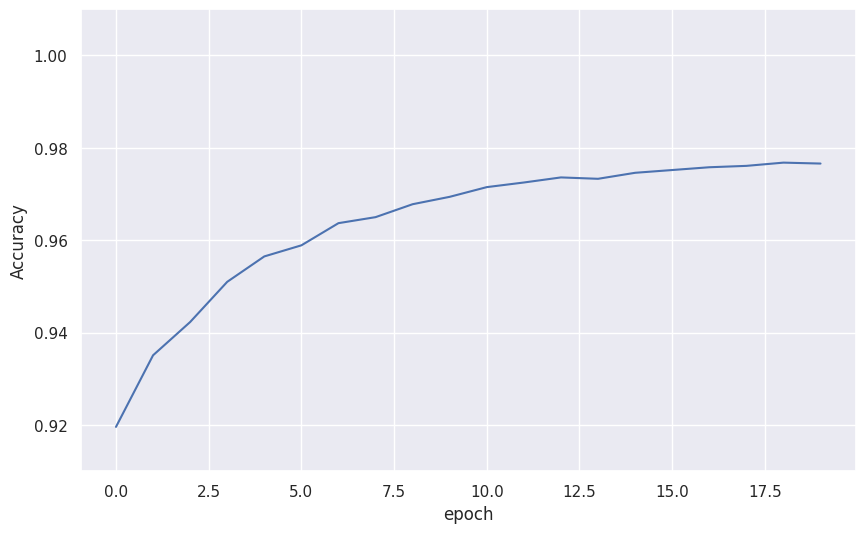

In [12]:
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.ylim(0.91, 1.01);

## Сохранение весом нейронной сети

Веса каждого из слоев представляют собой матрицы. Извлечем коэффициенты этих матриц и сохраним в текстовые файлы.

In [13]:
w1 = model.layers[0].get_weights()[0]
w2 = model.layers[1].get_weights()[0]
print(f"w1.shape: {w1.shape}, w2.shape: {w2.shape}")

w1.shape: (784, 128), w2.shape: (128, 10)


In [14]:
np.savetxt("w1.txt", w1)
np.savetxt("w2.txt", w2)

## Генерация тестовых данных
Для проверки корректности переноса инференса в код на C++. Сохраним предсказания вероятностей и классов в файлах вместе с признаками для сотни изображений.

In [15]:
X_test_subset = X_test[:100].reshape(-1, 28*28)
y_pred = model.predict(X_test_subset.astype('float32') / 255)
np.savetxt("test_mnist_mlp.txt", np.hstack((y_pred, X_test_subset)), fmt="%g")
y_pred_class = np.argmax(y_pred, axis=1)
np.savetxt("test_mnist_mlp_classes.txt", np.hstack((y_pred_class.reshape(-1, 1), X_test_subset)), fmt="%g")

4/4 [==============================] - 0s 1ms/step


## Сверточная нейронная сеть

Данный тип архитектуры хорошо подходит для обработки изображений.

### Предобработка признаков

Серточные сети обычно работают с двумерными изображениями. Поэтому для этого типа сетей мы выполним только нормировку признаков.

In [16]:
x_train.shape

(60000, 784)

In [17]:
x_train = X_train.astype('float32').reshape(-1, 28, 28, 1) / 255
x_test = X_test.astype('float32').reshape(-1, 28, 28, 1) / 255

In [18]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Input

cnn_model = Sequential()
cnn_model.add(Input(shape=x_train.shape[1:], name="input"))
cnn_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
# cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax', name="output"))

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [19]:
cnn_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2118 - accuracy: 0.9342 - val_loss: 0.0724 - val_accuracy: 0.9754
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0564 - accuracy: 0.9832 - val_loss: 0.0439 - val_accuracy: 0.9862
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0300 - val_accuracy: 0.9890
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0292 - val_accuracy: 0.9909
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0202 - accuracy: 0.9939 - val_loss: 0.0355 - val_accuracy: 0.9896
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0159 - accuracy: 0.9953 - val_loss: 0.0351 - val_accuracy: 0.9874
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0354 - val_accuracy: 0.9900
Epoch 

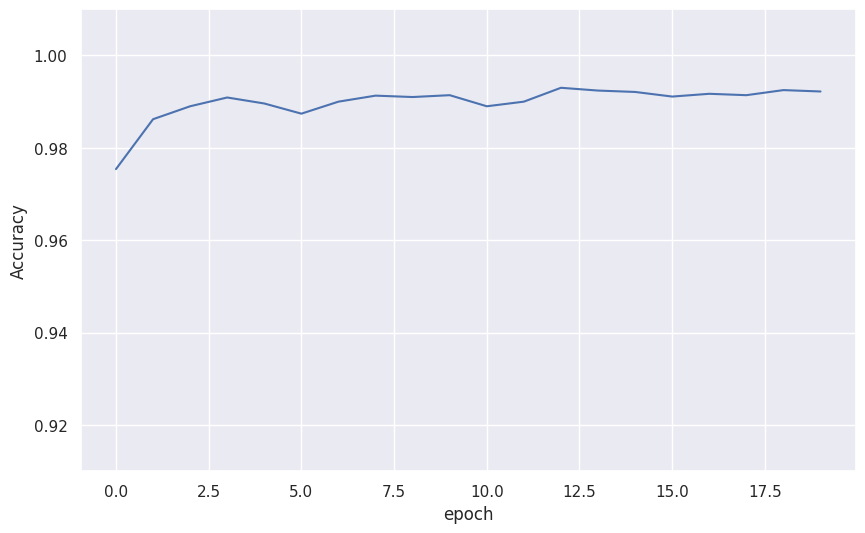

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.ylim(0.91, 1.01);

### Сохранение модели
Для хранения модели Tensorflow использует собственный формат SavedModel. Создается директория, в которой располагаются различные файлы и поддиректории, прдставляющие собой модели и различные параметры.

In [21]:
cnn_model.save("saved_model")

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


### Генерация данных для тестирования

In [22]:
x_test_subset = x_test[:100]
y_pred = cnn_model.predict(x_test_subset.reshape(-1, 28, 28, 1).astype('float32') / 255)
np.savetxt("test_mnist_cnn.txt", np.hstack((y_pred, x_test_subset.reshape(-1, 28*28))), fmt="%g")
y_pred_class = np.argmax(y_pred, axis=1)
np.savetxt("test_mnist_cnn_classes.txt", np.hstack((y_pred_class.reshape(-1, 1), x_test_subset.reshape(-1, 28*28))), fmt="%g")

4/4 [==============================] - 0s 2ms/step


## TensorFlow Lite

In [23]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp84r5t4ic/assets


INFO:tensorflow:Assets written to: /tmp/tmp84r5t4ic/assets
2023-07-24 11:46:27.724811: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-07-24 11:46:27.724849: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-07-24 11:46:27.725151: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp84r5t4ic
2023-07-24 11:46:27.726077: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-07-24 11:46:27.726092: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmp84r5t4ic
2023-07-24 11:46:27.728356: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-07-24 11:46:27.729106: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-07-24 11:46:27.764300: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

In [24]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)